In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
plt.rcParams.update({"text.usetex": False,
                     "font.size": 22,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [24]:
colors = ["tab:blue", "tab:orange","tab:green","tab:purple","tab:brown","tab:pink"]

In [25]:
# jpeg_map = pd.read_csv("../measurements_vidvrd/jpeg_small/map.csv")
# decom_map= pd.read_csv("../measurements_vidvrd/decomposition_small/map.csv")
# reg_map = pd.read_csv("../measurements_vidvrd/regression_small/map.csv")
# jpeg_cha = pd.read_csv("../measurements_vidvrd/jpeg_small/characteristic.csv")
# decom_cha= pd.read_csv("../measurements_vidvrd/decomposition_small/characteristic.csv")
# reg_cha = pd.read_csv("../measurements_vidvrd/regression_small/characteristic.csv")

jpeg_map = pd.read_csv("../measurements_vidvrd/jpeg2/map.csv")
decom_map= pd.read_csv("../measurements_vidvrd/decomposition2/map.csv")
reg_map = pd.read_csv("../measurements_vidvrd/regression2/map.csv")
jpeg_cha = pd.read_csv("../measurements_vidvrd/jpeg2/characteristic.csv")
decom_cha= pd.read_csv("../measurements_vidvrd/decomposition2/characteristic.csv")
reg_cha = pd.read_csv("../measurements_vidvrd/regression2/characteristic.csv")

In [26]:
local_map = pd.read_csv("../measurements_vidvrd/local/map.csv")
# local_map_decom = pd.read_csv("../../dynamic_framework/measurements_vidvrd/local_small_decom/map.csv")

In [27]:
pruning = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
quality = [60,70,80,90,100]

snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []

map_df_group = jpeg_map.groupby("pruning_thresh")
cha_df_group =jpeg_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        
        snr += cha_plot_df["reconstruct_snr"].to_list()
        # map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map["map"].to_numpy() 
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        # sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map["sensitivity"].to_numpy()
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())
        sens_diff += sens_des.tolist()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)

snr_cleaned_jpeg = snr[np.isnan(snr) ==False]
map_diff_jpeg = map_diff[np.isnan(snr) ==False]
sens_diff_jpeg = sens_diff[np.isnan(snr) ==False]

In [28]:
pruning = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25,0.3]
quality = [1,2,3,4,5]
snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []

map_df_group = reg_map.groupby("pruning_thresh")
cha_df_group =reg_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        # map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map["map"].to_numpy() 
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        # sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map["sensitivity"].to_numpy()
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())
        sens_diff += sens_des.tolist()
        

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)

snr_cleaned_reg = snr[np.isnan(snr) ==False]
map_diff_reg = map_diff[np.isnan(snr) ==False]
sens_diff_reg = sens_diff[np.isnan(snr) ==False]

In [29]:
pruning = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
quality = [2,4,6,8,10]
snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []

map_df_group = decom_map.groupby("pruning_thresh")
cha_df_group =decom_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        # map_des = (local_map_decom["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map_decom["map"].to_numpy() 
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        # sens_des = (local_map_decom["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map_decom["sensitivity"].to_numpy()
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())
        sens_diff += sens_des.tolist()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)

snr_cleaned_decom = snr[np.isnan(snr) ==False]
map_diff_decom = map_diff[np.isnan(snr) ==False]
sens_diff_decom = sens_diff[np.isnan(snr) ==False]

## Define fitting functions

In [30]:
def fitting_fun(x, bk,  h, k):
    # Ensure a and k are positive
    if h <= 0 or k <= 0:
        return np.full_like(x, np.nan)  # Return NaNs if parameters are invalid

    # Compute thresholds
    # thresh = a - np.log(100)/k
    bk = max(bk, np.log(h)/k)
    # Compute the function safely
    def second_piece(x):
        y = h* np.e ** (-k*x) 
        return y

    # Use correct conditions in np.piecewise
    return np.piecewise(
        x, 
        [x < bk, x>= bk], 
        [1, second_piece]
    )

In [31]:
def keep_top_10_percent(group):
    top_n = max(1, int(len(group) * 0.01))  # Ensure at least one value is kept
    return group.nlargest(top_n, 'y')

def remove_outliers(group):
    Q1 = group['y'].quantile(0.95)
    Q3 = group['y'].quantile(0.98)
    # IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR
    return group[(group['y'] >= Q1) & (group['y'] <= Q3)]

def split_in_bin(df, n_bins):
    # Sort by x values
    df = df.sort_values(by='x')
    bins = []
    for x in df["x"]:
        bins.append(round(x/2))
    df['bin'] = bins
    # Define bin edges
    # df['bin'] = pd.qcut(df['x'], n_bins, labels=False)  # Equal count bins
    return df
    

def df_filter(df):
    df_filtered = df.groupby('bin').apply(remove_outliers,include_groups=False)
    df_top_10 = df_filtered.groupby('bin').apply(keep_top_10_percent,include_groups=False).reset_index(drop=True)

    return df_top_10
    

def curve_fit_operation(df, one_point):
    params, _ = curve_fit(fitting_fun, df['x'].to_numpy(), df['y'].to_numpy(),p0=[one_point,10,0.5], method="dogbox")#
    return params

def get_group_upper_bound(df):
    x = []
    y=[]
    gs= df.groupby('bin')
    for k in gs.groups.keys():
        g = gs.get_group(k)
        x.append(g["x"].mean())
        Q1 = g['y'].quantile(0.25)
        Q3 = g['y'].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        y.append(upper_bound)
    return x, y


    

## map fitting

In [32]:
snrs = np.concatenate((snr_cleaned_jpeg,snr_cleaned_reg,snr_cleaned_decom ))
map_drop= np.concatenate((map_diff_jpeg,map_diff_reg,map_diff_decom))

# snrs = np.concatenate((snr_cleaned_jpeg,snr_cleaned_reg))
# map_drop= np.concatenate((map_diff_jpeg,map_diff_reg))

snrs = snrs[map_drop >=0]
map_drop = map_drop[map_drop >=0]

map_drop = map_drop[snrs>=0]
snrs = snrs[snrs>=0]

map_drop = map_drop[snrs<=40]
snrs = snrs[snrs<=40]

# Create DataFrame
df = pd.DataFrame({'x': snrs, 'y': map_drop})

df_bin = split_in_bin(df,20)

df_filtered = df_filter(df_bin)

df_filtered = split_in_bin(df_filtered,20)
param_map= curve_fit_operation(df_filtered, one_point=6)

In [33]:
param_map

array([6.        , 2.38531863, 0.17639792])

In [34]:
test_x = np.arange(0,40,0.1)

test_y = []
for x in test_x:
    test_y.append(fitting_fun(x,param_map[0], param_map[1],param_map[2]))

Text(0, 0.5, 'mAP drop $d^{mAP}$ [%]')

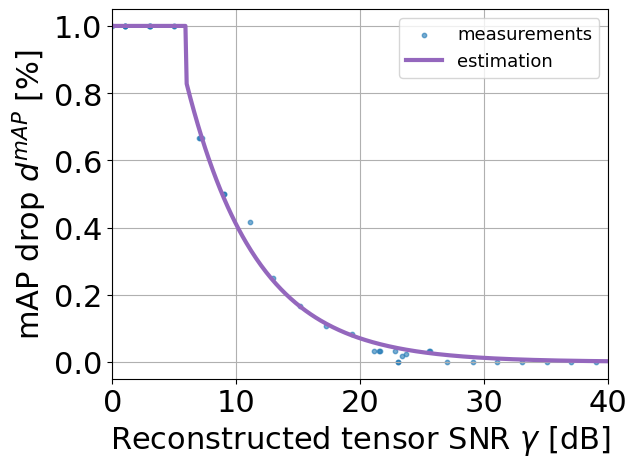

In [35]:
plt.figure()

plt.scatter(df_filtered["x"], df_filtered["y"],color="tab:blue", alpha=0.6, s=10,label="measurements" )
# plt.scatter(x,y,color="tab:blue", alpha=0.6, s=10,label="measurements" )
plt.plot(test_x, test_y, color="tab:purple",linewidth=3.0 ,label="estimation")

# plt.ylim([0,120])
plt.xlim([0,40])
plt.legend(loc="upper right", fontsize=13)
plt.grid()
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("mAP drop $d^{mAP}$ [%]")


/tmp/ipykernel_1219978/1167936784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bin', y='y', data=df_bin, palette='coolwarm',showfliers=False,whis=[5, 95])


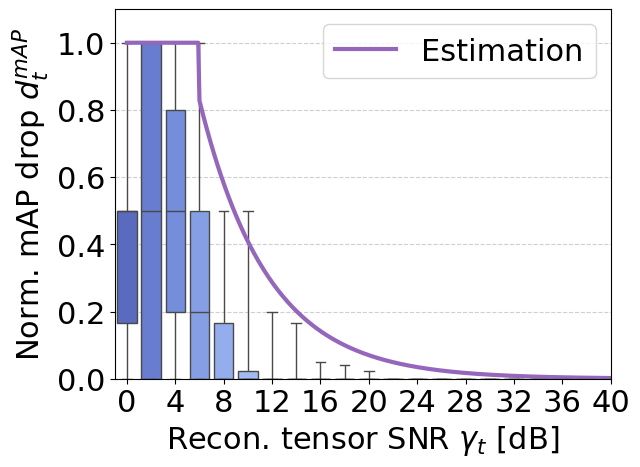

In [36]:
plt.figure()

sns.boxplot(x='bin', y='y', data=df_bin, palette='coolwarm',showfliers=False,whis=[5, 95])
# plt.xticks(rotation=90)
plt.plot(test_x/2, test_y, color="tab:purple",linewidth=3.0 ,label="Estimation")
# Customization
# plt.xticks(rotation=90)
plt.ylim([0,1.1])
plt.xlim([-0.5,10])
plt.xticks(np.arange(11)*2, np.arange(11)*4)
plt.xlabel("Recon. tensor SNR $\gamma_t$ [dB]")
plt.ylabel("Norm. mAP drop $d^{mAP}_t$")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
# plt.autoscale(axis="x",tight=True)
plt.savefig("../figures/vidvrd_map_drop.pdf",format="pdf", bbox_inches="tight")

## Sensitivity fitting

In [37]:
snrs = np.concatenate((snr_cleaned_jpeg,snr_cleaned_reg,snr_cleaned_decom ))
sem_drop= np.concatenate((sens_diff_jpeg,sens_diff_reg,sens_diff_decom))

# snrs = np.concatenate((snr_cleaned_jpeg,snr_cleaned_reg ))
# sem_drop= np.concatenate((sens_diff_jpeg,sens_diff_reg))

snrs = snrs[sem_drop >=0]
sem_drop = sem_drop[sem_drop >=0]

sem_drop = sem_drop[snrs>=0]
snrs = snrs[snrs>=0]

sem_drop = sem_drop[snrs<=40]
snrs = snrs[snrs<=40]
# Create DataFrame
df = pd.DataFrame({'x': snrs, 'y': sem_drop})

df_bin = split_in_bin(df,20)

df_filtered = df_filter(df_bin)
df_filtered = split_in_bin(df_filtered,20)

param_map= curve_fit_operation(df_filtered,6)

In [38]:
param_map

array([6.        , 3.45132362, 0.21025336])

In [39]:
test_x = np.arange(0,40,0.1)

test_y = []
for x in test_x:
    test_y.append(fitting_fun(x,param_map[0], param_map[1],param_map[2]))

Text(0, 0.5, 'Sensitivity drop $D^{sen}$ [%]')

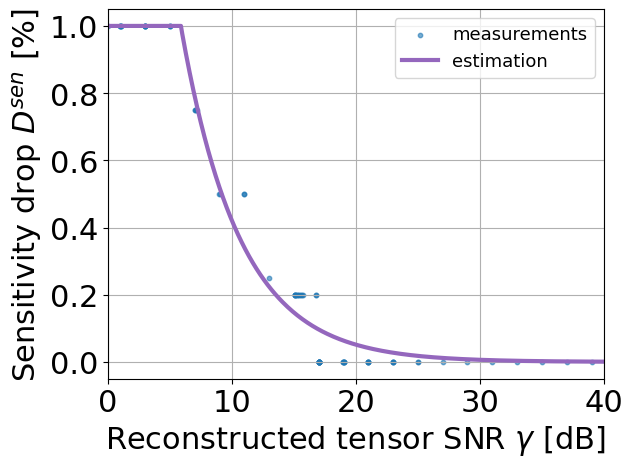

In [40]:
plt.figure()

plt.scatter(df_filtered["x"], df_filtered["y"],color="tab:blue", alpha=0.6, s=10,label="measurements" )
# plt.scatter(x,y,color="tab:blue", alpha=0.6, s=10,label="measurements" )
plt.plot(test_x, test_y, color="tab:purple",linewidth=3.0 ,label="estimation")

# plt.ylim([0,120])
plt.xlim([0,40])
plt.legend(loc="upper right", fontsize=13)
plt.grid()
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("Sensitivity drop $D^{sen}$ [%]")

/tmp/ipykernel_1219978/3396202420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bin', y='y', data=df_bin, palette='coolwarm',showfliers=False,whis=[5, 95])


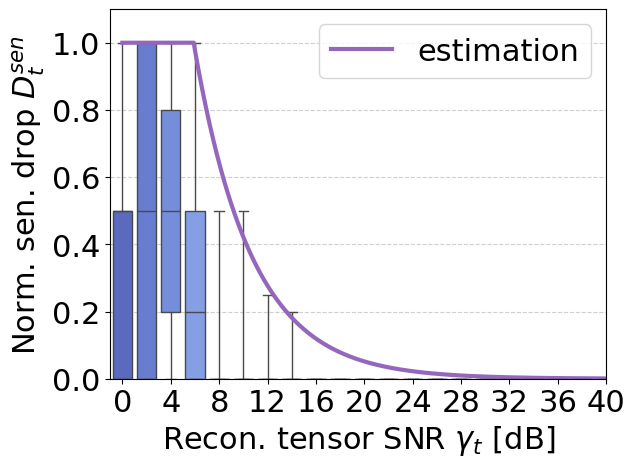

In [41]:
plt.figure()

sns.boxplot(x='bin', y='y', data=df_bin, palette='coolwarm',showfliers=False,whis=[5, 95])
# plt.xticks(rotation=90)
plt.plot(test_x/2, test_y, color="tab:purple",linewidth=3.0 ,label="estimation")
# Customization
# plt.xticks(rotation=90)
plt.ylim([0,1.1])
plt.xlim([-0.5,10])
plt.xticks(np.arange(11)*2, np.arange(11)*4)
plt.xlabel("Recon. tensor SNR $\gamma_t$ [dB]")
plt.ylabel("Norm. sen. drop $D^{sen}_t$")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
# plt.autoscale(axis="x",tight=True)
plt.savefig("../figures/vidvrd_sen_drop.pdf",format="pdf", bbox_inches="tight")